In [294]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in Loans dataset
# Set display to show all columns

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/SBAnational.csv")
df

c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


I can see there are some zeros under NAICS so I have to check for null values before wrangling the zeros as NaNs

In [3]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

The *ChgOffDate* column is the date that the loan gets "charged off" to the SBA (Defaulting). I'll drop this column to prevent leakage

In [4]:
df = df.drop("ChgOffDate", axis=1)

The first idea for feature engineering I had was to check if the borrower's state is the same as the bank's. I'll have to drop those rows of NaNs in *BankState* to make that possible. 1,566 rows looks like a lot but I can live with that since I have 899,000 observations.

In [5]:
# Drop Bank state null rows
df = df[df["BankState"].notna()]

*MIS_Status* is the target variable so I have to drop the rows that are null as well

In [6]:
# Drop target variable with no values

df = df[df["MIS_Status"].notna()]

In [7]:
# Check number of observations and update NaN count

print(len(df))
df.isnull().sum()

895654


LoanNr_ChkDgt           0
Name                   14
City                   28
State                  13
Zip                     0
Bank                    0
BankState               0
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              134
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4511
LowDoc               2578
DisbursementDate     2173
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [8]:
df[df["City"].isnull()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
42535,1330603010,BUSATH PHOTOGRAPHY,NaN,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,300,2,2.0,0,0,0,0,N,N,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,"$190,000.00","$190,000.00"
177891,2268732010,"HAYES/DOCKSIDE,INC",NaN,LA,70130,NEW ORLEANS REGIONAL BUS. DEVE,LA,0,17-Dec-81,1982,240,23,2.0,0,0,0,0,N,N,10-Feb-82,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$500,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",NaN,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,300,10,2.0,0,0,0,0,N,N,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$150,000.00"
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,180,45,2.0,0,0,0,0,N,N,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,300,20,2.0,0,0,0,0,N,N,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,"$211,000.00","$211,000.00"
270268,2884202008,"SAN DIEGO REFRIGERATD SVCS,INC",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,26-Jun-81,1981,180,28,1.0,0,0,0,0,N,N,10-Sep-81,"$407,000.00",$0.00,P I F,$0.00,"$407,000.00","$407,000.00"
270270,2884212000,"EMACO, INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,180,7,2.0,0,0,0,0,N,N,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
270277,2884232006,"MAYER BLUEPRINT,INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,29-Jul-81,1981,240,20,2.0,0,0,0,0,N,N,10-Sep-81,"$159,000.00",$0.00,P I F,$0.00,"$159,000.00","$159,000.00"
270284,2884252001,TEX-WIPE COMPANY,NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,31-Aug-81,1981,240,26,2.0,0,0,0,0,N,N,4-Nov-81,"$365,000.00",$0.00,P I F,$0.00,"$365,000.00","$365,000.00"
326169,3258222000,LAKEWOOD HEALTH CARE CENTER LT,NaN,OH,44115,GROWTH CAPITAL CORP.,OH,0,18-Nov-81,1982,300,40,1.0,0,0,0,0,N,N,10-Feb-82,"$205,000.00",$0.00,P I F,$0.00,"$205,000.00","$205,000.00"


I was hoping the State null rows were in the same as the City null rows so I could find them at once. Looks like I'll have to research each column one at a time from the zipcode

I stumbled upon a brilliant package that can update City and State from zip codes. Check out [*uszipcode*](https://pypi.org/project/uszipcode/0.1.2/)

In [9]:
# I tried ZipcodeSearchEngine like in the documentation but got an import error
# Autofill had a SearchEngine class so try that
from uszipcode import SearchEngine
search = SearchEngine()

In [10]:
# Assign null States df subset to a smaller df
df_State_null = df[df["State"].isnull()].copy(deep = True)

In [11]:
df_State_null

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,240,19,1.0,0,19,0,0,N,N,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,73,8,1.0,0,0,0,0,N,N,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,"$119,000.00","$119,000.00"
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$252,600.00"
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,60,4,1.0,0,0,1,0,N,N,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,"$250,000.00","$212,500.00"
385418,3714383003,"LAKE MOVIE TYMES, INC.",LAKE OZARK,NaN,65049,CENTRAL BK OF LAKE OF OZARKS,MO,532230,4-Jan-90,1990,60,1,1.0,0,0,1,0,N,N,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"


I can see from the States subset that in addition to high cardinality, there also wrong values in *City*. Can only compare States anyway so drop that column

In [12]:
# Drop City column
df = df.drop("City", axis=1)

In [13]:
# Create functions to use zipcode for state

def state_finder(x):
    zipcode = search.by_zipcode(x)
    state = zipcode.state
    return state if state else np.NaN

In [14]:
for i in df_State_null.index:
    df_State_null.loc[i, "State"] = state_finder(df_State_null.loc[i, "Zip"])

In [15]:
df_State_null

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,CA,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,240,19,1.0,0,19,0,0,N,N,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,73,8,1.0,0,0,0,0,N,N,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,KS,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,"$119,000.00","$119,000.00"
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",TX,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,FL,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
366158,3557093005,CASCO SERVICE,CASCO,WI,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$252,600.00"
367007,3563473008,P & P TOOL INC,SOMERSET,WI,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,UT,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,60,4,1.0,0,0,1,0,N,N,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,"$250,000.00","$212,500.00"
385418,3714383003,"LAKE MOVIE TYMES, INC.",LAKE OZARK,MO,65049,CENTRAL BK OF LAKE OF OZARKS,MO,532230,4-Jan-90,1990,60,1,1.0,0,0,1,0,N,N,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"


In [16]:
# Update dataframe
df.update(df_State_null)

In [17]:
df.isnull().sum()

LoanNr_ChkDgt           0
Name                   14
State                   2
Zip                     0
Bank                    0
BankState               0
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              134
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4511
LowDoc               2578
DisbursementDate     2173
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [18]:
# Look at two rows with null States

df[df["State"].isnull()]

,LoanNr_ChkDgt,Name,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1.380800e+09,TRYON COATS & LEATHER,NaN,0.0,KEYBANK NATIONAL ASSOCIATION,NY,0.0,18-May-66,1966,282.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
306274,3.113583e+09,THE COMPUTER EDGE,NaN,96205.0,RTC/WESTPORT SAVINGS BANK,CA,541511.0,21-Jan-88,1988,73.0,8.0,1.0,0.0,0.0,0.0,0.0,N,N,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"


In [19]:
# Drop both rows
df = df.drop([49244, 306274])

In [20]:
# Don't need the Name of the business either so drop that column

df = df.drop("Name", axis=1)

In [21]:
# That concludes cleaning of loanee data
# Check size of data frame
df.shape

(895652, 24)

In [22]:
# With over 895,000 observations, I'm good with dropping the remaining NaN rows
# Quick check first to confirm null columns and amount

df.isnull().sum()

LoanNr_ChkDgt           0
State                   0
Zip                     0
Bank                    0
BankState               0
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              134
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4511
LowDoc               2578
DisbursementDate     2173
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [23]:
# I'm going against imputing these values since the dataset is quite large
# but also because I think these columns could really affect my model

df = df.dropna()

In [24]:
# Another look at size and null count
print(df.shape)
df.isnull().sum()

(886293, 24)


LoanNr_ChkDgt        0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [25]:
# Want to look at range of Fiscal year the loan was approved in ApprovalFY
df["ApprovalFY"].value_counts(dropna=False).index

Index([   2006,    2007,    2003,    2005,  '2004',    2002,  '1995',    2008,
          1997,    1999,    2000,    2001,    1996,    1998,  '2005',    2004,
          1993,    1992,    1994,    2009,    2010,    1991,    1990,    1989,
        '1994',    2011,    2012,  '1996',    2013,    1987,    1986,    1984,
          1988,    1985,    1983,    1982,    1981,    1980,    1979,    2014,
          1978,  '1977',  '1978',  '1979',  '1976',    1973,    1974,    1972,
        '1981',    1975,  '1980',  '1971',  '1982', '1976A',  '1975',    1977,
          1976,  '1970',  '1983',  '1984',  '1974',  '1969',    1971,  '1968'],
      dtype='object')

In [26]:
# Correct 1976A error
df["ApprovalFY"] = df["ApprovalFY"].replace({"1976A" : 1976})

In [27]:
# Change column to integers
df.ApprovalFY = df.ApprovalFY.astype(int)

In [28]:
df.ApprovalFY.value_counts().sort_index()

1968        1
1969        3
1970        8
1971       18
1972       25
1973       48
1974       40
1975       29
1976       78
1977      133
1978      235
1979      341
1980      426
1981      579
1982      698
1983     1616
1984     1951
1985     1890
1986     2079
1987     2184
1988     1891
1989    12972
1990    14638
1991    15447
1992    20671
1993    23139
1994    31460
1995    41639
1996    39954
1997    37679
1998    35970
1999    37280
2000    37235
2001    37163
2002    44105
2003    57688
2004    68074
2005    76906
2006    75660
2007    71406
2008    38618
2009    18293
2010    16026
2011    11813
2012     5553
2013     2367
2014      264
Name: ApprovalFY, dtype: int64

Dropping *ChgOffPrinGr* column as well to prevent more leakage

In [29]:
df = df.drop("ChgOffPrinGr", axis=1)

In [30]:
# Look at the dtypes
df.dtypes

LoanNr_ChkDgt        float64
State                 object
Zip                  float64
Bank                  object
BankState             object
NAICS                float64
ApprovalDate          object
ApprovalFY             int32
Term                 float64
NoEmp                float64
NewExist             float64
CreateJob            float64
RetainedJob          float64
FranchiseCode        float64
UrbanRural           float64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
GrAppv                object
SBA_Appv              object
dtype: object

Dont need *LoanNr_ChkDgt*, *Zip* should be an object, dates should be changed to datetime objects, while the last object columns should be changed to integers, assuming loans only give out full dollar amounts

In [31]:
# Drop id type column
df = df.drop("LoanNr_ChkDgt", axis = 1)

# Convert Zip column
df["Zip"] = df["Zip"].astype(object)

In [32]:
# Convert approval date and disbursement date

df["ApprovalDate"] = pd.to_datetime(df["ApprovalDate"], infer_datetime_format= True)
df["DisbursementDate"] = pd.to_datetime(df["DisbursementDate"], infer_datetime_format= True)

In [33]:
# Look at one of the $ columns to figure how to clean
df.loc[0, "DisbursementGross"]

'$60,000.00 '

Have to remove the $ sign, the comma, the dot, decimals and space at the end

In [34]:
def string_cleaner(amount):
    amount = amount[:-4].strip("$").replace(",", "")
    return int(amount)

In [35]:
# Create subset list to be cleaned
ending = ("Gross", "Appv")
string_columns = [col for col in df if col.endswith(ending)]
string_columns

['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

In [36]:
for col in string_columns:
    df[col] = df[col].apply(string_cleaner)

In [37]:
# Look at dtypes again
df.dtypes

State                        object
Zip                          object
Bank                         object
BankState                    object
NAICS                       float64
ApprovalDate         datetime64[ns]
ApprovalFY                    int32
Term                        float64
NoEmp                       float64
NewExist                    float64
CreateJob                   float64
RetainedJob                 float64
FranchiseCode               float64
UrbanRural                  float64
RevLineCr                    object
LowDoc                       object
DisbursementDate     datetime64[ns]
DisbursementGross             int64
BalanceGross                  int64
MIS_Status                   object
GrAppv                        int64
SBA_Appv                      int64
dtype: object

Let's explore more. We have a bunch of floats that I'm guessing were from the NaNs. Some of those should be boolean columns. Time to look at unique values

In [38]:
df.select_dtypes("object").nunique()

State            51
Zip           33501
Bank           5788
BankState        56
RevLineCr        18
LowDoc            8
MIS_Status        2
dtype: int64

In [39]:
df.select_dtypes("float64").nunique()

NAICS            1311
Term              411
NoEmp             597
NewExist            3
CreateJob         246
RetainedJob       356
FranchiseCode    2754
UrbanRural          3
dtype: int64

Few things to note:
* Bank State is greater than 52. Have to look into that, so might as well look at State column as well
* *RevLineCr* and *LowDoc* should be booleans
* Some of the floats should be booleans. I'll look into those columns as well to see if they should be integers

In [40]:
# Check unique Bank States
df["BankState"].unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID', 'WY',
       'NM', 'DC', 'NV', 'NE', 'PR', 'HI', 'VT', 'AK', 'GU', 'AN', 'EN',
       'VI'], dtype=object)

In [41]:
bank_states = set(df["BankState"])

In [42]:
len(bank_states)

56

In [43]:
# Found States list on Github
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [44]:
# View objects not in states
list(bank_states.difference(states))

['GU', 'PR', 'VI', 'AN', 'EN']

In [45]:
# Look at States column too
list(set(df["State"]).difference(states))

[]

It seems the Bank States include territories but I'm not sure about "AN" and "EN". Check number of occurences

In [46]:
(df.BankState.values == "AN").sum()

1

In [47]:
(df.BankState.values == "EN").sum()

1

Just one occurence each so I'm going to drop them

In [48]:
df = df[(df.BankState != "AN") & (df.BankState != "EN")]

In [49]:
list(set(df["BankState"]).difference(states))

['GU', 'PR', 'VI']

In [50]:
# Look at column for Revolving Line of Credit
df["RevLineCr"].unique()

array(['N', '0', 'Y', 'T', '`', ',', '1', 'C', '3', '2', 'R', '7', 'A',
       '5', '.', '4', '-', 'Q'], dtype=object)

Interesting values. I'm going to do a value_counts

In [51]:
df["RevLineCr"].value_counts()

N    415483
0    257367
Y    198269
T     15107
1        23
R        14
`        11
2         6
C         2
-         1
Q         1
A         1
7         1
3         1
.         1
5         1
,         1
4         1
Name: RevLineCr, dtype: int64

In [52]:
df["LowDoc"].value_counts()

N    775235
Y    107899
0      1236
C       756
S       598
A       492
R        74
1         1
Name: LowDoc, dtype: int64

In [53]:
df[((df["RevLineCr"] == "Y") | (df["RevLineCr"] == "N")) & ((df["LowDoc"] == "Y") | (df["LowDoc"] == "N"))]

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,FIFTH THIRD BANK,OH,451120.0,1997-02-28,1997,84.0,4.0,2.0,0.0,0.0,1.0,0.0,N,Y,1999-02-28,60000,0,P I F,60000,48000
1,IN,46526,1ST SOURCE BANK,IN,722410.0,1997-02-28,1997,60.0,2.0,2.0,0.0,0.0,1.0,0.0,N,Y,1997-05-31,40000,0,P I F,40000,32000
2,IN,47401,GRANT COUNTY STATE BANK,IN,621210.0,1997-02-28,1997,180.0,7.0,1.0,0.0,0.0,1.0,0.0,N,N,1997-12-31,287000,0,P I F,287000,215250
3,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0.0,1997-02-28,1997,60.0,2.0,1.0,0.0,0.0,1.0,0.0,N,Y,1997-06-30,35000,0,P I F,35000,28000
4,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0.0,1997-02-28,1997,240.0,14.0,1.0,7.0,7.0,1.0,0.0,N,N,1997-05-14,229000,0,P I F,229000,229000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899158,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0.0,1997-02-27,1997,84.0,5.0,2.0,0.0,0.0,1.0,0.0,N,Y,1997-06-30,79000,0,P I F,79000,63200
899160,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130.0,1997-02-27,1997,60.0,6.0,1.0,0.0,0.0,1.0,0.0,Y,N,1997-10-31,85000,0,P I F,85000,42500
899161,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321.0,1997-02-27,1997,108.0,26.0,1.0,0.0,0.0,1.0,0.0,N,N,1997-09-30,300000,0,P I F,300000,225000
899162,HI,96830,BANK OF HAWAII,HI,0.0,1997-02-27,1997,60.0,6.0,1.0,0.0,0.0,1.0,0.0,N,Y,1997-03-31,75000,0,CHGOFF,75000,60000


In [54]:
len(df)

886291

This is the part I took some time to think about. Should I only keep instances of Y or N? That would take my number of observations from 886,000 to 611,000. Some things to consider:
* There look to be some common extra values other than Y, N, 0 or 1 such as C, A, R. Could they mean something?
* Can I be sure 0 and 1 are encodings for N or Y considering there are other numbers in the set of unique values?
* What if I encode the column for the most frequent values such as \[N, 0, Y, T, Other\]?

I decided to err on the side of caution. It would be unrealistic to ask someone to choose options between N, 0, Y, T or Other for a feature if I do get to deploy a web app. Considering this is financial data, I want a model that can generalize really well so I'll take only the rows I'm sure of with Y or N. I'm good with this because 600,000 is still a good amount of data.

In [55]:
df = df[((df["RevLineCr"] == "Y") | (df["RevLineCr"] == "N")) & ((df["LowDoc"] == "Y") | (df["LowDoc"] == "N"))]
len(df)

611186

In [56]:
# Look at future target column, MIS_Status
df["MIS_Status"].unique()

array(['P I F', 'CHGOFF'], dtype=object)

"P I F" stands for "Paid in Full" while "CHGOFF" stands for "Charged Off". I'll address these further after cleaning the columns

In [57]:
# Start exploring float columns
# Some NAICS columns have zero. Check how many
len(df[df["NAICS"] == 0])

153553

Some research into NAICS showed how the first two codes reveal the industry sector. I'll create a dictionary so I can map the digits

In [58]:
naics_industry = {11 : "Agriculture, Forestry, Fishing and Hunting",
                  21 : "Mining, Quarrying, and Oil & Gas Extraction",
                  22 : "Utilities",
                  23 : "Construction",
                  31 : "Manufacturing",
                  32 : "Manufacturing",
                  33 : "Manufacturing",
                  42 : "Wholesale Trade",
                  44 : "Retail Trade",
                  45 : "Retail Trade",
                  48 : "Transportation and Warehousing",
                  49 : "Transportation and Warehousing",
                  51 : "Information",
                  52 : "Finance and Insurance",
                  53 : "Real Estate and Rental and Leasing",
                  54 : "Professional, Scientific, and Technical Services",
                  55 : "Management of companies and enterprises",
                  56 : "Administrative, Support, Waste Management, and Remediation Services",
                  61 : "Educational Services",
                  62 : "Health Care and Social Assistance",
                  71 : "Arts, Entertainment, and Recreation",
                  72 : "Accomodation and Food Services",
                  81 : "Other Services except Public Administration",
                  92 : "Public Administration"}

In [59]:
# Transform NAICS to show only first two digits if it has a value
df["NAICS"] = df["NAICS"].astype(str).apply(lambda x: 0 if x.startswith("0") else x[:2]).astype(int)

In [60]:
# View df to be sure it indexed right after setting with copy warning
df

,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,FIFTH THIRD BANK,OH,45,1997-02-28,1997,84.0,4.0,2.0,0.0,0.0,1.0,0.0,N,Y,1999-02-28,60000,0,P I F,60000,48000
1,IN,46526,1ST SOURCE BANK,IN,72,1997-02-28,1997,60.0,2.0,2.0,0.0,0.0,1.0,0.0,N,Y,1997-05-31,40000,0,P I F,40000,32000
2,IN,47401,GRANT COUNTY STATE BANK,IN,62,1997-02-28,1997,180.0,7.0,1.0,0.0,0.0,1.0,0.0,N,N,1997-12-31,287000,0,P I F,287000,215250
3,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60.0,2.0,1.0,0.0,0.0,1.0,0.0,N,Y,1997-06-30,35000,0,P I F,35000,28000
4,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240.0,14.0,1.0,7.0,7.0,1.0,0.0,N,N,1997-05-14,229000,0,P I F,229000,229000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899158,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,1997-02-27,1997,84.0,5.0,2.0,0.0,0.0,1.0,0.0,N,Y,1997-06-30,79000,0,P I F,79000,63200
899160,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997-02-27,1997,60.0,6.0,1.0,0.0,0.0,1.0,0.0,Y,N,1997-10-31,85000,0,P I F,85000,42500
899161,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,33,1997-02-27,1997,108.0,26.0,1.0,0.0,0.0,1.0,0.0,N,N,1997-09-30,300000,0,P I F,300000,225000
899162,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60.0,6.0,1.0,0.0,0.0,1.0,0.0,N,Y,1997-03-31,75000,0,CHGOFF,75000,60000


Confirm again later with number of NaNs after mapping

In [61]:
# Rename NAICS to NAICS_Industry
# I've heard list comprehensions are usually faster so I'll try that instead of rename

df.columns = ["NAICS_Industry" if x == "NAICS" else x for x in df.columns]

In [62]:
# Change NAICS_Industry to show the actual industries

df["NAICS_Industry"] = df["NAICS_Industry"].map(naics_industry)
df

,State,Zip,Bank,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,FIFTH THIRD BANK,OH,Retail Trade,1997-02-28,1997,84.0,4.0,2.0,0.0,0.0,1.0,0.0,N,Y,1999-02-28,60000,0,P I F,60000,48000
1,IN,46526,1ST SOURCE BANK,IN,Accomodation and Food Services,1997-02-28,1997,60.0,2.0,2.0,0.0,0.0,1.0,0.0,N,Y,1997-05-31,40000,0,P I F,40000,32000
2,IN,47401,GRANT COUNTY STATE BANK,IN,Health Care and Social Assistance,1997-02-28,1997,180.0,7.0,1.0,0.0,0.0,1.0,0.0,N,N,1997-12-31,287000,0,P I F,287000,215250
3,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,NaN,1997-02-28,1997,60.0,2.0,1.0,0.0,0.0,1.0,0.0,N,Y,1997-06-30,35000,0,P I F,35000,28000
4,FL,32801,FLORIDA BUS. DEVEL CORP,FL,NaN,1997-02-28,1997,240.0,14.0,1.0,7.0,7.0,1.0,0.0,N,N,1997-05-14,229000,0,P I F,229000,229000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899158,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,NaN,1997-02-27,1997,84.0,5.0,2.0,0.0,0.0,1.0,0.0,N,Y,1997-06-30,79000,0,P I F,79000,63200
899160,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,Retail Trade,1997-02-27,1997,60.0,6.0,1.0,0.0,0.0,1.0,0.0,Y,N,1997-10-31,85000,0,P I F,85000,42500
899161,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,Manufacturing,1997-02-27,1997,108.0,26.0,1.0,0.0,0.0,1.0,0.0,N,N,1997-09-30,300000,0,P I F,300000,225000
899162,HI,96830,BANK OF HAWAII,HI,NaN,1997-02-27,1997,60.0,6.0,1.0,0.0,0.0,1.0,0.0,N,Y,1997-03-31,75000,0,CHGOFF,75000,60000


In [63]:
len(df[df["NAICS_Industry"].isnull()])

153553

Looks like everything mapped correctly in lieu of the SettingWithCopyWarning. I don't want to suppress the warning in case something does not map correctly, I can be notified and make changes. So far, everything has worked as it should have.

In [64]:
# Drop rows of NaN that don't have an industry value
df = df.dropna()

I am now down to 457,000 observations. A big drop from the start but necessary for the reasons I gave earlier. Still a good number of observations, all things considered.

Next, there are some columns that should be integers: *term* for loan term in months, *NoEmp* for number of employees, *CreateJob* for number of jobs created, and *RetainedJob* for number of jobs retained. Convert these columns to the appropriate type.

In [65]:
# Convert columns
int_columns = ["Term", "NoEmp", "CreateJob", "RetainedJob"]

df[int_columns] = df[int_columns].astype(int)

c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [66]:
# Check dataframe
df

,State,Zip,Bank,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,FIFTH THIRD BANK,OH,Retail Trade,1997-02-28,1997,84,4,2.0,0,0,1.0,0.0,N,Y,1999-02-28,60000,0,P I F,60000,48000
1,IN,46526,1ST SOURCE BANK,IN,Accomodation and Food Services,1997-02-28,1997,60,2,2.0,0,0,1.0,0.0,N,Y,1997-05-31,40000,0,P I F,40000,32000
2,IN,47401,GRANT COUNTY STATE BANK,IN,Health Care and Social Assistance,1997-02-28,1997,180,7,1.0,0,0,1.0,0.0,N,N,1997-12-31,287000,0,P I F,287000,215250
5,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,Manufacturing,1997-02-28,1997,120,19,1.0,0,0,1.0,0.0,N,N,1997-06-30,517000,0,P I F,517000,387750
7,FL,34491,REGIONS BANK,AL,Other Services except Public Administration,1997-02-28,1997,84,1,2.0,0,0,1.0,0.0,N,Y,1998-06-30,45000,0,P I F,45000,36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,MD,21043,WELLS FARGO BANK NATL ASSOC,CA,Construction,1997-02-27,1997,60,5,1.0,0,0,1.0,0.0,Y,N,1997-03-31,25000,0,P I F,25000,12500
899146,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,Manufacturing,1997-02-27,1997,240,8,1.0,4,0,1.0,0.0,N,N,1997-08-13,189000,0,P I F,189000,189000
899157,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,Manufacturing,1997-02-27,1997,36,40,1.0,0,0,1.0,0.0,N,N,1997-03-31,200000,0,P I F,200000,150000
899160,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,Retail Trade,1997-02-27,1997,60,6,1.0,0,0,1.0,0.0,Y,N,1997-10-31,85000,0,P I F,85000,42500


Everything converted properly. Next, look at the *NewExist* column. The column was encoded such that 1 is an existing business while 2 is a new business. Check the unique values in the column.

In [67]:
df["NewExist"].unique()

array([2., 1., 0.])

In [68]:
# Check how many times 0 occurs
len(df[df["NewExist"] == 0.])

679

In [69]:
# I decided not to drop that with only 3 unique features
# I'll encode 0 as undefined

# Multiple lines so I'll make a function instead of using apply like last time for readability

def encode_business(num):
    num = int(num)
    
    if num == 2:
        encoding = "New"
        
    elif num == 1:
        encoding = "Existing"
    
    elif num == 0:
        encoding = "Undefined"
    
    return encoding

In [70]:
df_business_subset = df.copy(deep = True)

In [71]:
# Encode columns
df_business_subset["NewExist"] = df_business_subset["NewExist"].apply(encode_business)

In [72]:
#df_business_subset

In [73]:
# Update dataframe
df.update(df_business_subset)

c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [74]:
df

,State,Zip,Bank,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,FIFTH THIRD BANK,OH,Retail Trade,1997-02-28,1997,84,4,New,0,0,1.0,0.0,N,Y,1999-02-28,60000,0,P I F,60000,48000
1,IN,46526,1ST SOURCE BANK,IN,Accomodation and Food Services,1997-02-28,1997,60,2,New,0,0,1.0,0.0,N,Y,1997-05-31,40000,0,P I F,40000,32000
2,IN,47401,GRANT COUNTY STATE BANK,IN,Health Care and Social Assistance,1997-02-28,1997,180,7,Existing,0,0,1.0,0.0,N,N,1997-12-31,287000,0,P I F,287000,215250
5,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,Manufacturing,1997-02-28,1997,120,19,Existing,0,0,1.0,0.0,N,N,1997-06-30,517000,0,P I F,517000,387750
7,FL,34491,REGIONS BANK,AL,Other Services except Public Administration,1997-02-28,1997,84,1,New,0,0,1.0,0.0,N,Y,1998-06-30,45000,0,P I F,45000,36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,MD,21043,WELLS FARGO BANK NATL ASSOC,CA,Construction,1997-02-27,1997,60,5,Existing,0,0,1.0,0.0,Y,N,1997-03-31,25000,0,P I F,25000,12500
899146,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,Manufacturing,1997-02-27,1997,240,8,Existing,4,0,1.0,0.0,N,N,1997-08-13,189000,0,P I F,189000,189000
899157,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,Manufacturing,1997-02-27,1997,36,40,Existing,0,0,1.0,0.0,N,N,1997-03-31,200000,0,P I F,200000,150000
899160,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,Retail Trade,1997-02-27,1997,60,6,Existing,0,0,1.0,0.0,Y,N,1997-10-31,85000,0,P I F,85000,42500


I experimented with an earlier method but didn't use .loc to see if there would still be a SettingWithCopyWarning. Still got the warning but everything encoded right so we keep moving.

I'll look at *FranchiseCode* next. Values of 0 or 1 signify no franchise. I thought about encoding the codes to each franchise like in *NAICS_Industry* but that would not be much different than having the name of the business. Instead, I'll encode if the business is part of a franchise or not.

In [75]:
df["FranchiseCode"].value_counts()

1.0        263780
0.0        179548
78760.0       823
68020.0       310
21780.0       183
            ...  
1502.0          1
10670.0         1
24034.0         1
24046.0         1
65496.0         1
Name: FranchiseCode, Length: 1693, dtype: int64

As suspected, most of these small businesses are not part of a franchise. I'll convert to int first then encode

In [76]:
df["FranchiseCode"] = df["FranchiseCode"].astype(int)
df["FranchiseCode"] = df["FranchiseCode"].apply(lambda x: "Y" if x > 1 else "N")

<ipython-input-76-b3c1cde08428>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FranchiseCode"] = df["FranchiseCode"].astype(int)
<ipython-input-76-b3c1cde08428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FranchiseCode"] = df["FranchiseCode"].apply(lambda x: "Y" if x > 1 else "N")


In [77]:
df["FranchiseCode"].value_counts()

N    443328
Y     14305
Name: FranchiseCode, dtype: int64

Everything encoded right. I'll change the column name to show it's a boolean column now

In [78]:
df.columns = ["Franchise" if x == "FranchiseCode" else x for x in df.columns]

Next I'll look at the *UrbanRural* column. It was encoded such that 1 = Urban, 2 = rural, and 0 = Undefined. I'll rather have these values as in *NewExist*

In [79]:
df["UrbanRural"].value_counts()

1.0    285891
0.0    108622
2.0     63120
Name: UrbanRural, dtype: int64

In [80]:
# Create encoding function
def encode_area(num):
    num = int(num)
    
    if num == 2:
        encoding = "Rural"
        
    elif num == 1:
        encoding = "Urban"
    
    elif num == 0:
        encoding = "Undefined"
    
    return encoding

In [81]:
# Encode column
df["UrbanRural"] = df["UrbanRural"].apply(encode_area)

<ipython-input-81-63874c950e42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UrbanRural"] = df["UrbanRural"].apply(encode_area)


In [82]:
df["UrbanRural"].value_counts()

Urban        285891
Undefined    108622
Rural         63120
Name: UrbanRural, dtype: int64

Finally, we can look at the target column, *MIS_Status*

In [83]:
df["MIS_Status"].value_counts()

P I F     359215
CHGOFF     98418
Name: MIS_Status, dtype: int64

I'm after those loans that get charged off so I'll encode "CHGOFF" as 1 and "P I F" as 0

In [84]:
# Replace values
df["MIS_Status"] = df["MIS_Status"].replace({"CHGOFF" : 1, "P I F" : 0})

<ipython-input-84-c5f7513dda86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MIS_Status"] = df["MIS_Status"].replace({"CHGOFF" : 1, "P I F" : 0})


In [85]:
# Usual confirmation check
df["MIS_Status"].value_counts()

0    359215
1     98418
Name: MIS_Status, dtype: int64

In [86]:
# Rename column to Default instead
df.columns = ["Default" if x == "MIS_Status" else x for x in df.columns]

In [87]:
#View dataframe
df

,State,Zip,Bank,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Default,GrAppv,SBA_Appv
0,IN,47711,FIFTH THIRD BANK,OH,Retail Trade,1997-02-28,1997,84,4,New,0,0,N,Undefined,N,Y,1999-02-28,60000,0,0,60000,48000
1,IN,46526,1ST SOURCE BANK,IN,Accomodation and Food Services,1997-02-28,1997,60,2,New,0,0,N,Undefined,N,Y,1997-05-31,40000,0,0,40000,32000
2,IN,47401,GRANT COUNTY STATE BANK,IN,Health Care and Social Assistance,1997-02-28,1997,180,7,Existing,0,0,N,Undefined,N,N,1997-12-31,287000,0,0,287000,215250
5,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,Manufacturing,1997-02-28,1997,120,19,Existing,0,0,N,Undefined,N,N,1997-06-30,517000,0,0,517000,387750
7,FL,34491,REGIONS BANK,AL,Other Services except Public Administration,1997-02-28,1997,84,1,New,0,0,N,Undefined,N,Y,1998-06-30,45000,0,0,45000,36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,MD,21043,WELLS FARGO BANK NATL ASSOC,CA,Construction,1997-02-27,1997,60,5,Existing,0,0,N,Undefined,Y,N,1997-03-31,25000,0,0,25000,12500
899146,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,Manufacturing,1997-02-27,1997,240,8,Existing,4,0,N,Undefined,N,N,1997-08-13,189000,0,0,189000,189000
899157,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,Manufacturing,1997-02-27,1997,36,40,Existing,0,0,N,Undefined,N,N,1997-03-31,200000,0,0,200000,150000
899160,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,Retail Trade,1997-02-27,1997,60,6,Existing,0,0,N,Undefined,Y,N,1997-10-31,85000,0,0,85000,42500


In [88]:
# Look at dtypes
df.dtypes

State                        object
Zip                          object
Bank                         object
BankState                    object
NAICS_Industry               object
ApprovalDate         datetime64[ns]
ApprovalFY                    int32
Term                          int32
NoEmp                         int32
NewExist                     object
CreateJob                     int32
RetainedJob                   int32
Franchise                    object
UrbanRural                   object
RevLineCr                    object
LowDoc                       object
DisbursementDate     datetime64[ns]
DisbursementGross             int64
BalanceGross                  int64
Default                       int64
GrAppv                        int64
SBA_Appv                      int64
dtype: object

In [89]:
# View cardinality
df.select_dtypes("object").nunique()

State                51
Zip               26910
Bank               4836
BankState            53
NAICS_Industry       20
NewExist              3
Franchise             2
UrbanRural            3
RevLineCr             2
LowDoc                2
dtype: int64

I think it could have been cool to use the zip code and banks as features but the cardinality is just too high. Drop these columns

In [90]:
df = df.drop(["Zip", "Bank"], axis = 1)

## EDA

In [230]:
# Look at describe
df.describe(datetime_is_numeric= True)

,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv,Days_To_Disbursement,SBA_Percentage,Disbursement_Year
count,456691,456691.000000,456691.000000,456691.000000,456691.000000,456691.000000,456691,4.566910e+05,456691.000000,4.566910e+05,4.566910e+05,456691.000000,456691.000000,456691.000000
mean,2003-04-11 18:09:56.648499840,2003.013020,93.989452,9.919466,1.904831,4.777127,2003-07-29 13:50:23.531447040,1.724874e+05,0.214351,1.545884e+05,1.175399e+05,108.819756,0.652821,2003.056167
min,1984-04-16 00:00:00,1984.000000,1.000000,0.000000,0.000000,0.000000,1984-07-03 00:00:00,4.000000e+03,0.000000,1.000000e+03,5.000000e+02,0.000000,0.050000,1984.000000
25%,2000-03-03 00:00:00,2000.000000,59.000000,2.000000,0.000000,0.000000,2000-08-16 00:00:00,3.500000e+04,0.000000,2.500000e+04,1.275000e+04,26.000000,0.500000,2000.000000
50%,2005-01-21 00:00:00,2005.000000,84.000000,4.000000,0.000000,1.000000,2005-04-30 00:00:00,7.600000e+04,0.000000,5.000000e+04,3.500000e+04,50.000000,0.500000,2005.000000
75%,2007-03-02 00:00:00,2007.000000,90.000000,9.000000,1.000000,5.000000,2007-04-30 00:00:00,1.930000e+05,0.000000,1.590000e+05,1.250000e+05,108.000000,0.820000,2007.000000
max,2014-06-25 00:00:00,2014.000000,527.000000,9999.000000,5621.000000,4441.000000,2028-06-18 00:00:00,1.144632e+07,1.000000,5.000000e+06,4.500000e+06,9132.000000,1.000000,2028.000000
std,NaN,5.656464,68.388520,57.309699,16.917102,15.698330,NaN,2.753850e+05,0.410372,2.616555e+05,2.144841e+05,190.790804,0.179415,5.574921


I can notice some interesting features but I'll look at describe for categorical features first.

In [92]:
df.describe(exclude = ["number", "datetime"], datetime_is_numeric= True)

,State,BankState,NAICS_Industry,NewExist,Franchise,UrbanRural,RevLineCr,LowDoc
count,457633,457633,457633,457633,457633,457633,457633,457633
unique,51,53,20,3,2,3,2,2
top,CA,NC,Retail Trade,Existing,N,Urban,N,N
freq,61452,56440,81064,335833,443328,285891,265664,432477


For further analysis, I'll use an automated EDA I stumbled upon called sweetviz.

In [96]:
import sweetviz as sv

In addition to installing ipywidgets (see the accompanying pipfile), I had to run the following command in the cmd line: jupyter nbextension enable --py widgetsnbextension

If you're not comfortable with the installs or any other reason, you can use pandas profiling instead. The package is also installed in the pipfile

In [97]:
# Call sweetviz for dataframe
report = sv.analyze(df, target_feat= "Default")

report.show_html("SBA National Report.html")


Report SBA National Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


You can view the generated report in the SBA National Report.html file among my files which shows a few graphs for EDA. I like sweetviz because I can specify a target variable. If you want to run pandas profiling, or see an automated EDA within this notebook, uncomment the cell below

In [110]:
# Pandas profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df)
#profile

Quite a few columns are left skewed. I even have an observation with loan term for 527 months. I'll take a look at some of these rows

In [103]:
df.loc[df.NoEmp == 9999]

,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Default,GrAppv,SBA_Appv
613940,HI,HI,"Professional, Scientific, and Technical Services",1993-12-09,1994,84,9999,Existing,0,0,N,Undefined,N,N,1994-01-31,21000,0,0,21000,18900


In [105]:
df["NoEmp"].value_counts(ascending = True).head(15)

206     1
201     1
712     1
1603    1
198     1
2500    1
4800    1
2121    1
2120    1
193     1
447     1
332     1
1100    1
189     1
1920    1
Name: NoEmp, dtype: int64

I was wondering if a small business could have 9,999 employees. It seems that are multiple factors that determine classification and it's entirely possible

In [106]:
df.loc[df.Term == 527]

,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Default,GrAppv,SBA_Appv
495391,CA,TX,Accomodation and Food Services,2001-08-07,2001,527,6,Existing,0,0,N,Urban,N,N,2001-08-31,1332000,0,0,1332000,999000


In [109]:
df["Term"].value_counts().sort_index(ascending = False).head(15)

527    1
449    1
445    1
440    1
434    1
428    1
423    1
409    1
396    1
391    1
389    1
388    2
386    2
385    1
382    1
Name: Term, dtype: int64

I thought 527 months was a loan outlier from an error but it seems there are select loans that run for a good number of years. I'll try to engineer a feature with the *Term* attribute but I still believe 527 is an error because 44 years for a loan term is highly unusual to say the least.

## Feature Engineering

First couple ideas I had when I looked at the dataframe:

* Is the bank state in the same state as the business?
* Look at disbursement date in relation to approval date
* Look at Disbursement Gross, Balance Gross, and Gross Approved
* What percentage of the loan did the SBA guarantee?
* The article gave me an idea to check if the economy was in recession

These were my intial ideas but I'll add more as I go along including the aforementioned Term engineering

In [113]:
# Make column for same state feature
df["Same_State"] = df["State"] == df["BankState"]
df["Same_State"] = df["Same_State"].replace({True: "Y", False: "N"})

In [115]:
df["Same_State"].value_counts()

N    248359
Y    209274
Name: Same_State, dtype: int64

That's a fairly good split that could be important. Next is a look at the disbursement date. 

When I first saw the data I did not understand why there was both approval and disbursement date. Shouldn't they be the same?
Then I remembered that wasn't the case with my student loan. There was a delay between when I got the approval letter and I received the loan.

I wonder if bigger loans take longer to arrive, or other mitigating factors. I'll create a column for the days it took to receive the loan after approval.

In [118]:
# Create date difference column
df["Days_To_Disbursement"] = (df["DisbursementDate"] - df["ApprovalDate"]).dt.days

In [119]:
df

,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Default,GrAppv,SBA_Appv,Same_State,Days_To_Disbursement
0,IN,OH,Retail Trade,1997-02-28,1997,84,4,New,0,0,N,Undefined,N,Y,1999-02-28,60000,0,0,60000,48000,N,730
1,IN,IN,Accomodation and Food Services,1997-02-28,1997,60,2,New,0,0,N,Undefined,N,Y,1997-05-31,40000,0,0,40000,32000,Y,92
2,IN,IN,Health Care and Social Assistance,1997-02-28,1997,180,7,Existing,0,0,N,Undefined,N,N,1997-12-31,287000,0,0,287000,215250,Y,306
5,CT,DE,Manufacturing,1997-02-28,1997,120,19,Existing,0,0,N,Undefined,N,N,1997-06-30,517000,0,0,517000,387750,N,122
7,FL,AL,Other Services except Public Administration,1997-02-28,1997,84,1,New,0,0,N,Undefined,N,Y,1998-06-30,45000,0,0,45000,36000,N,487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,MD,CA,Construction,1997-02-27,1997,60,5,Existing,0,0,N,Undefined,Y,N,1997-03-31,25000,0,0,25000,12500,N,32
899146,CA,CA,Manufacturing,1997-02-27,1997,240,8,Existing,4,0,N,Undefined,N,N,1997-08-13,189000,0,0,189000,189000,Y,167
899157,CA,CA,Manufacturing,1997-02-27,1997,36,40,Existing,0,0,N,Undefined,N,N,1997-03-31,200000,0,0,200000,150000,Y,32
899160,OH,IL,Retail Trade,1997-02-27,1997,60,6,Existing,0,0,N,Undefined,Y,N,1997-10-31,85000,0,0,85000,42500,N,246


c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


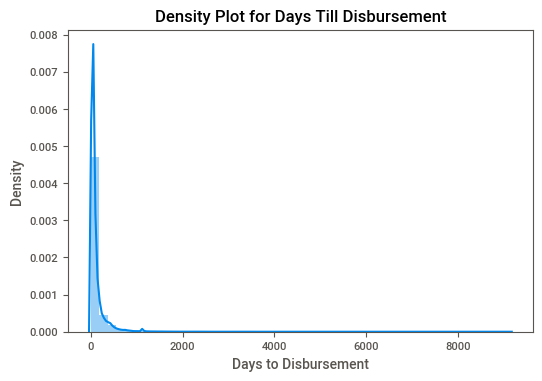

In [129]:
# Look at a histogram of new feature

fig, ax = plt.subplots()
ax = sns.distplot(a= df["Days_To_Disbursement"], kde= True)
plt.xlabel("Days to Disbursement")
plt.ylabel("Density")
plt.title("Density Plot for Days Till Disbursement")
plt.show()

Another left skewed column as expected if I ignore the negative values. Let's take a look at some of those negative values.

In [124]:
df["Days_To_Disbursement"].value_counts().sort_index(ascending = True).head(15)

-3614    1
-669     1
-602     1
-567     1
-357     1
-334     1
-316     1
-309     1
-303     1
-302     1
-274     1
-260     1
-227     1
-191     1
-186     1
Name: Days_To_Disbursement, dtype: int64

I'll drop the rows with negative values since loans ideally cannot be disbursed before approval

In [125]:
df = df[df["Days_To_Disbursement"] >= 0]

In [126]:
len(df)

457216

Next I'll look at some of the financial numbers columns: *DisbursementGross, BalanceGross, GrAppv*

At first glance, it looked like *DisbursementGross* and *GrAppv* have the same values. So are there times someone receives more or less than the full amount they were approved for? Have to check if the columns are equal.


But first, I want to look at this *BalanceGross* column

In [134]:
# Take a look at the Balance Gross column, specifically non-zero values
df_balance = df[df["BalanceGross"] != 0]

In [137]:
df_balance["Balance_Date"] = df_balance.apply(lambda x: x["ApprovalDate"] + pd.offsets.MonthEnd(x["Term"]), axis = 1)
df_balance

<ipython-input-137-99a0f43622aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balance["Balance_Date"] = df_balance.apply(lambda x: x["ApprovalDate"] + pd.offsets.MonthEnd(x["Term"]), axis = 1)


,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Default,GrAppv,SBA_Appv,Same_State,Days_To_Disbursement,Balance_Date
28198,LA,LA,"Mining, Quarrying, and Oil & Gas Extraction",2006-03-01,2006,129,3,New,0,0,N,Rural,N,N,2006-06-30,1080000,827875,0,1080000,810000,Y,121,2016-11-30
253953,CO,IL,Accomodation and Food Services,2007-10-30,2008,84,10,New,3,13,Y,Urban,Y,N,2007-11-30,87491,25000,0,25000,12500,N,31,2014-09-30
339776,OR,OR,Accomodation and Food Services,2009-04-07,2009,60,30,Existing,5,30,N,Rural,Y,N,2009-04-30,166826,37100,0,100000,50000,Y,23,2014-03-31
382117,PA,PA,Other Services except Public Administration,2009-10-09,2010,12,8,Existing,0,8,N,Urban,Y,N,2010-05-01,75000,43127,0,75000,37500,Y,204,2010-09-30
389415,IL,IN,Retail Trade,2009-11-16,2010,60,8,New,8,0,N,Urban,N,N,2010-01-01,90000,84617,0,120000,60000,N,46,2014-10-31
518257,WI,IL,"Arts, Entertainment, and Recreation",1992-09-08,1992,249,1,New,0,0,N,Undefined,N,N,1992-10-31,245000,1760,0,245000,183750,N,53,2013-05-31
759993,OH,OH,Manufacturing,2004-10-19,2005,237,12,Existing,0,0,N,Urban,N,N,2005-09-30,1070000,996262,0,1070000,802500,Y,346,2024-06-30


I played around with this subset to see what exactly the gross balance was trying to convey. The description of the column was given as gross amount outstanding. After some more research, I have concluded that these are loans still in repayment. I have no intention to use this as a loan officer using my model would have no way of knowing the future value, unless the column refers to other loans with the bank. Too many ifs and maybes so I'll drop these observations then drop the column.

In [138]:
# Drop observations then column
df = df[df["BalanceGross"] == 0]
df = df.drop("BalanceGross", axis=1)
df

,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv,Same_State,Days_To_Disbursement
0,IN,OH,Retail Trade,1997-02-28,1997,84,4,New,0,0,N,Undefined,N,Y,1999-02-28,60000,0,60000,48000,N,730
1,IN,IN,Accomodation and Food Services,1997-02-28,1997,60,2,New,0,0,N,Undefined,N,Y,1997-05-31,40000,0,40000,32000,Y,92
2,IN,IN,Health Care and Social Assistance,1997-02-28,1997,180,7,Existing,0,0,N,Undefined,N,N,1997-12-31,287000,0,287000,215250,Y,306
5,CT,DE,Manufacturing,1997-02-28,1997,120,19,Existing,0,0,N,Undefined,N,N,1997-06-30,517000,0,517000,387750,N,122
7,FL,AL,Other Services except Public Administration,1997-02-28,1997,84,1,New,0,0,N,Undefined,N,Y,1998-06-30,45000,0,45000,36000,N,487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,MD,CA,Construction,1997-02-27,1997,60,5,Existing,0,0,N,Undefined,Y,N,1997-03-31,25000,0,25000,12500,N,32
899146,CA,CA,Manufacturing,1997-02-27,1997,240,8,Existing,4,0,N,Undefined,N,N,1997-08-13,189000,0,189000,189000,Y,167
899157,CA,CA,Manufacturing,1997-02-27,1997,36,40,Existing,0,0,N,Undefined,N,N,1997-03-31,200000,0,200000,150000,Y,32
899160,OH,IL,Retail Trade,1997-02-27,1997,60,6,Existing,0,0,N,Undefined,Y,N,1997-10-31,85000,0,85000,42500,N,246


In [145]:
# Look at cases with disbursed amount being different from approved amount
len(df[df["DisbursementGross"] < df["GrAppv"]])

22280

In [143]:
len(df[df["DisbursementGross"] > df["GrAppv"]])

143737

That's a good number of cases so I'll create two features, one for each case

In [151]:
df["Disbursed_Less_Approved"] = df["DisbursementGross"] < df["GrAppv"]
df["Disbursed_Less_Approved"] = df["Disbursed_Less_Approved"].replace({True: "Y", False : "N"})

In [152]:
# Now for when disbursed was more than approved value
df["Disbursed_More_Approved"] = df["DisbursementGross"] > df["GrAppv"]
df["Disbursed_More_Approved"] = df["Disbursed_More_Approved"].replace({True: "Y", False : "N"})

In [155]:
# Quick sanity check
df['Disbursed_Less_Approved'].value_counts()

N    434929
Y     22280
Name: Disbursed_Less_Approved, dtype: int64

Next thing I want to look at is what percentage of the loan is guaranteed by the SBA

In [156]:
# Create column for percentage
df["SBA_Percentage"] = (df["SBA_Appv"] / df["GrAppv"]).round(2)
df.head()

,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv,Same_State,Days_To_Disbursement,Disbursed_Less_Approved,Disbursed_More_Approved,SBA_Percentage
0,IN,OH,Retail Trade,1997-02-28,1997,84,4,New,0,0,N,Undefined,N,Y,1999-02-28,60000,0,60000,48000,N,730,N,N,0.80
1,IN,IN,Accomodation and Food Services,1997-02-28,1997,60,2,New,0,0,N,Undefined,N,Y,1997-05-31,40000,0,40000,32000,Y,92,N,N,0.80
2,IN,IN,Health Care and Social Assistance,1997-02-28,1997,180,7,Existing,0,0,N,Undefined,N,N,1997-12-31,287000,0,287000,215250,Y,306,N,N,0.75
5,CT,DE,Manufacturing,1997-02-28,1997,120,19,Existing,0,0,N,Undefined,N,N,1997-06-30,517000,0,517000,387750,N,122,N,N,0.75
7,FL,AL,Other Services except Public Administration,1997-02-28,1997,84,1,New,0,0,N,Undefined,N,Y,1998-06-30,45000,0,45000,36000,N,487,N,N,0.80


I would like to see the impact of a recession on the loan. A brilliant feature would have been if the maturity date fell within a recession or right after a recession. However I can't create that future as once again, anybody using my model can't see the future. Or if they can, they don't need my model

Instead, I'll create a feature for if the year the loan was approved, "ApprovalFY" fell within a recession. I don't think it's as strong a feature but it could still be interesting to look at.

In [175]:
# I think I should be more accurate and look at actual dates
# I'll have to make a recession function
# Create date ranges for recession
recession_90s = pd.date_range(start= "July-01-1990", end= "March-31-1991")

recession_2000s = pd.date_range(start= "March-01-2001", end= "November-30-2001")

great_recession = pd.date_range(start= "December-01-2007", end= "June-30-2009")

Admittedly, the first two were not the biggest recessions of the century but they'll be included as they are still counted in history.

In [176]:
# Create list of all recession date ranges
recession_list = [recession_90s, recession_2000s, great_recession]

In [202]:
# Create function
def recession_decider(date):
    if date in recession_90s:
        value = "Y"
    elif date in recession_2000s:
        value = "Y"
    elif date in great_recession:
        value = "Y"
    else:
        value = "N"
    
    return value

In [199]:
recession_2000s

DatetimeIndex(['2001-03-01', '2001-03-02', '2001-03-03', '2001-03-04',
               '2001-03-05', '2001-03-06', '2001-03-07', '2001-03-08',
               '2001-03-09', '2001-03-10',
               ...
               '2001-11-21', '2001-11-22', '2001-11-23', '2001-11-24',
               '2001-11-25', '2001-11-26', '2001-11-27', '2001-11-28',
               '2001-11-29', '2001-11-30'],
              dtype='datetime64[ns]', length=275, freq='D')

In [203]:
# Apply function
df["During_Recession"] = df["ApprovalDate"].apply(recession_decider)

In [206]:
df["During_Recession"].value_counts(normalize = True)

N    0.888228
Y    0.111772
Name: During_Recession, dtype: float64

In [207]:
#df[df["ApprovalFY"] == 2001]

Only 11% of loans approved during a recession. Can't say it's all that surprising. I'm going to add a feature to check if the loanee received the funds during a recession considering some observations have a big days to disbursement count. As high as 732 days so some of those observations might be getting dropped later.

In [210]:
# First rename During_Recession column
df.columns = ["Approved_recession" if x == "During_Recession" else x for x in df.columns]

In [212]:
# Create feature for disbursed during recession
df["Disbursed_Recession"] = df["DisbursementDate"].apply(recession_decider)

In [214]:
df["Disbursed_Recession"].value_counts(normalize = True)

N    0.880101
Y    0.119899
Name: Disbursed_Recession, dtype: float64

Roughly the same percentage. This might not impact my model as much as I thought.

I want to break down the *Term* column next. I had a couple ideas for how to approach this. A long term loan is generally defined as 3 to 25 years. But 36 months is not long enough to have an effect. Even the landmark 60 months (5 years) is right around the 25th percentile of my observations as seen in df.describe() above. I decided to use 84 months (7 years) for a boolean feature column, which is right at the 50th percentile.

I'll also create a column by binning the *Term* column.

In [217]:
# Create boolean column
df["Term_Below_7_Years"] = df["Term"].apply(lambda x: "Y" if x < 84 else "N")

In [218]:
# Creat binned columns. I'll bin such that less than 3 years is short
# Also bin long term loans for multiples of 5
# Interesting concept as term is in months so can't use year integers
# I'll assume standard rounding convention with half going to the next bin
df["Term_Bins"] = pd.cut(x = df["Term"], bins = [0, 29, 65, 125, 185, 245, 305, float("inf")], 
                         labels=["Less than 3 years", "3 to 5 years", "6 to 10 years", "11 to 15 years", "16 to 20 years", "21 to 25 years", "More than 25 years"])

In [219]:
# Check unique values
df["Term_Bins"].unique()

['6 to 10 years', '3 to 5 years', '11 to 15 years', '21 to 25 years', 'Less than 3 years', '16 to 20 years', NaN, 'More than 25 years']
Categories (7, object): ['Less than 3 years' < '3 to 5 years' < '6 to 10 years' < '11 to 15 years' < '16 to 20 years' < '21 to 25 years' < 'More than 25 years']

In [221]:
# There shouldn't be NaNs
# Check subset
df[df["Term_Bins"].isnull()]

,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv,Same_State,Days_To_Disbursement,Disbursed_Less_Approved,Disbursed_More_Approved,SBA_Percentage,Approved_recession,Disbursed_Recession,Term_Below_7_Years,Term_Bins
635,CA,CA,Retail Trade,2001-06-25,2001,0,1,Existing,0,0,N,Undefined,Y,N,2001-06-30,29000,1,29000,14500,Y,5,N,N,0.5,Y,Y,Y,NaN
673,NY,SD,Wholesale Trade,2006-02-07,2006,0,10,Existing,7,10,N,Urban,Y,N,2006-03-31,41847,1,30000,15000,N,52,N,Y,0.5,N,N,Y,NaN
776,NV,CA,Manufacturing,2003-01-10,2003,0,10,Existing,0,0,N,Undefined,Y,N,2003-03-31,50000,1,50000,25000,N,80,N,N,0.5,N,N,Y,NaN
916,FL,CA,Manufacturing,2003-04-18,2003,0,20,Existing,0,0,N,Undefined,N,N,2003-04-30,150000,1,150000,75000,N,12,N,N,0.5,N,N,Y,NaN
1084,RI,RI,Real Estate and Rental and Leasing,2003-07-31,2003,0,11,Existing,0,0,N,Undefined,Y,N,2003-08-31,432428,1,150000,75000,Y,31,N,Y,0.5,N,N,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884703,MN,SD,Accomodation and Food Services,2006-01-13,2006,0,20,Existing,3,23,N,Rural,Y,N,2007-02-28,37619,1,15000,7500,N,411,N,Y,0.5,N,N,Y,NaN
885472,LA,LA,Transportation and Warehousing,1996-10-25,1997,0,6,New,0,0,N,Undefined,N,Y,1997-02-28,50000,1,50000,40000,Y,126,N,N,0.8,N,N,Y,NaN
885545,MA,NY,Wholesale Trade,2006-01-17,2006,0,7,Existing,2,7,N,Urban,Y,N,2006-03-31,174521,1,125000,62500,N,73,N,Y,0.5,N,N,Y,NaN
891494,TX,TX,"Professional, Scientific, and Technical Services",1996-12-12,1997,0,4,Existing,0,0,N,Undefined,N,Y,1997-01-31,43700,1,43700,34960,Y,50,N,N,0.8,N,N,Y,NaN


In [224]:
# I have observations with zero months for loan term
# I'm going to drop these observations under the assumption that a loan term can't be zero

df = df.dropna()

*ApprovalFY* gave me an idea to break down the dates and discard those columns rather than having datetime objects in my model. Even though fiscal year of approval is not always the same as year of approval, I'll leave it as a stand in.

Going off the idea of fiscal years and quarters, I'll create a month feature column. However, I don't think it's necessary to create a days feature. Does it really matter if you are approved for/get a loan early or late in a month? It could matter for disbursement depending on the business but I'd rather not create just disbursement and leave out approval.

In [228]:
# Break down dates
df["Approval_month"] = df["ApprovalDate"].dt.strftime("%b")
df["Disbursement_Year"] = df["DisbursementDate"].dt.year
df["Disbursement_Month"] = df["DisbursementDate"].dt.strftime("%b")

<ipython-input-228-387df1b45492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Approval_month"] = df["ApprovalDate"].dt.strftime("%b")
<ipython-input-228-387df1b45492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Disbursement_Year"] = df["DisbursementDate"].dt.year
<ipython-input-228-387df1b45492>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [229]:
# Sanity check for the warning
df

,State,BankState,NAICS_Industry,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Default,GrAppv,SBA_Appv,Same_State,Days_To_Disbursement,Disbursed_Less_Approved,Disbursed_More_Approved,SBA_Percentage,Approved_recession,Disbursed_Recession,Term_Below_7_Years,Term_Bins,Approval_month,Disbursement_Year,Disbursement_Month
0,IN,OH,Retail Trade,1997-02-28,1997,84,4,New,0,0,N,Undefined,N,Y,1999-02-28,60000,0,60000,48000,N,730,N,N,0.80,N,N,N,6 to 10 years,Feb,1999,Feb
1,IN,IN,Accomodation and Food Services,1997-02-28,1997,60,2,New,0,0,N,Undefined,N,Y,1997-05-31,40000,0,40000,32000,Y,92,N,N,0.80,N,N,Y,3 to 5 years,Feb,1997,May
2,IN,IN,Health Care and Social Assistance,1997-02-28,1997,180,7,Existing,0,0,N,Undefined,N,N,1997-12-31,287000,0,287000,215250,Y,306,N,N,0.75,N,N,N,11 to 15 years,Feb,1997,Dec
5,CT,DE,Manufacturing,1997-02-28,1997,120,19,Existing,0,0,N,Undefined,N,N,1997-06-30,517000,0,517000,387750,N,122,N,N,0.75,N,N,N,6 to 10 years,Feb,1997,Jun
7,FL,AL,Other Services except Public Administration,1997-02-28,1997,84,1,New,0,0,N,Undefined,N,Y,1998-06-30,45000,0,45000,36000,N,487,N,N,0.80,N,N,N,6 to 10 years,Feb,1998,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,MD,CA,Construction,1997-02-27,1997,60,5,Existing,0,0,N,Undefined,Y,N,1997-03-31,25000,0,25000,12500,N,32,N,N,0.50,N,N,Y,3 to 5 years,Feb,1997,Mar
899146,CA,CA,Manufacturing,1997-02-27,1997,240,8,Existing,4,0,N,Undefined,N,N,1997-08-13,189000,0,189000,189000,Y,167,N,N,1.00,N,N,N,16 to 20 years,Feb,1997,Aug
899157,CA,CA,Manufacturing,1997-02-27,1997,36,40,Existing,0,0,N,Undefined,N,N,1997-03-31,200000,0,200000,150000,Y,32,N,N,0.75,N,N,Y,3 to 5 years,Feb,1997,Mar
899160,OH,IL,Retail Trade,1997-02-27,1997,60,6,Existing,0,0,N,Undefined,Y,N,1997-10-31,85000,0,85000,42500,N,246,N,N,0.50,N,N,Y,3 to 5 years,Feb,1997,Oct


In [231]:
# Everything looks good so go ahead and drop those columns
df = df.drop(["ApprovalDate", "DisbursementDate"], axis=1)

In [232]:
# Done the engineering I had planned. Look at summary again
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,Default,GrAppv,SBA_Appv,Days_To_Disbursement,SBA_Percentage,Disbursement_Year
count,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691
mean,2003.01,93.9895,9.91947,1.90483,4.77713,172487,0.214351,154588,117540,108.82,0.652821,2003.06
std,5.65646,68.3885,57.3097,16.9171,15.6983,275385,0.410372,261655,214484,190.791,0.179415,5.57492
min,1984,1,0,0,0,4000,0,1000,500,0,0.05,1984
25%,2000,59,2,0,0,35000,0,25000,12750,26,0.5,2000
50%,2005,84,4,0,1,76000,0,50000,35000,50,0.5,2005
75%,2007,90,9,1,5,193000,0,159000,125000,108,0.82,2007
max,2014,527,9999,5621,4441,1.14463e+07,1,5e+06,4.5e+06,9132,1,2028


Few things look out of place:
* Have a max days to disbursement of 9132
* Disbursement year of 2028
* Max loan term of 527 months
* Still not comfortable with the max values of the employee/job columns especially with such low means/medians

Now some of the interesting things I noticed:
* Mean loan term is 93 months (almost 8 years) but with a big standard deviation of 68 months
* Mean disbursement is around \\$172,000 while median is around \\$76,000. Very right skewed
* SBA percentage is a bit right skewed with the mean at 65% and a median of 50%

In [234]:
# Look at object columns
df.describe(exclude= "number")

,State,BankState,NAICS_Industry,NewExist,Franchise,UrbanRural,RevLineCr,LowDoc,Same_State,Disbursed_Less_Approved,Disbursed_More_Approved,Approved_recession,Disbursed_Recession,Term_Below_7_Years,Term_Bins,Approval_month,Disbursement_Month
count,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691,456691
unique,51,53,20,3,2,3,2,2,2,2,2,2,2,2,7,12,12
top,CA,NC,Retail Trade,Existing,N,Urban,N,N,N,N,N,N,N,N,6 to 10 years,Mar,Apr
freq,61327,56358,80885,335119,442406,285262,265182,431601,247816,434436,313255,405633,401925,263185,218033,42679,51442


The most interesting thing of note is the mode of the *Term_Bins* feature is 6 to 10 years.

I'm going to drop some of the high percentile outliers I mentioned earlier. Since they were right skewed, I'm comfortable with only cutting one tail.
I'll drop days to disbursement to 2 years max. I still think that's very extreme and unrealistic but I'm running with it

In [267]:
# I experimented a bit with these percentiles before settling on a point I'm neither happy nor disappointed with

df = df[(df["Days_To_Disbursement"] <= 730) & 
        (df["Disbursement_Year"] <= np.percentile(df["Disbursement_Year"], 99.99)) &
        (df["Term"] <= np.percentile(df["Term"], 99.999)) &
        (df["NoEmp"] <= np.percentile(df["NoEmp"], 99.995)) &
        (df["CreateJob"] <= np.percentile(df["CreateJob"], 99.995)) &
        (df["RetainedJob"] <= np.percentile(df["RetainedJob"], 99.995))]

In [268]:
# A look at the new summary
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,Default,GrAppv,SBA_Appv,Days_To_Disbursement,SBA_Percentage,Disbursement_Year
count,448428,448428,448428,448428,448428,448428,448428,448428,448428,448428,448428,448428
mean,2003.02,93.8859,9.57637,1.8167,4.72527,172928,0.217533,154761,117441,89.724,0.653411,2003.02
std,5.67841,68.4122,35.2358,9.30405,12.5686,275642,0.412569,261686,213873,112.341,0.179139,5.58681
min,1984,1,0,0,0,4000,0,1000,500,0,0.05,1984
25%,2000,58,2,0,0,35000,0,25000,12750,26,0.5,2000
50%,2005,84,4,0,1,77000,0,50000,36000,48,0.5,2005
75%,2007,90,9,1,5,194219,0,160000,125000,103,0.82,2007
max,2014,428,4005,456,515,1.14463e+07,1,5e+06,4.5e+06,730,1,2014


In [269]:
# Final shape of dataframe
df.shape

(448428, 29)

In [270]:
# Another look at dataframe
df

,State,BankState,NAICS_Industry,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,Franchise,UrbanRural,RevLineCr,LowDoc,DisbursementGross,Default,GrAppv,SBA_Appv,Same_State,Days_To_Disbursement,Disbursed_Less_Approved,Disbursed_More_Approved,SBA_Percentage,Approved_recession,Disbursed_Recession,Term_Below_7_Years,Term_Bins,Approval_month,Disbursement_Year,Disbursement_Month
0,IN,OH,Retail Trade,1997,84,4,New,0,0,N,Undefined,N,Y,60000,0,60000,48000,N,730,N,N,0.80,N,N,N,6 to 10 years,Feb,1999,Feb
1,IN,IN,Accomodation and Food Services,1997,60,2,New,0,0,N,Undefined,N,Y,40000,0,40000,32000,Y,92,N,N,0.80,N,N,Y,3 to 5 years,Feb,1997,May
2,IN,IN,Health Care and Social Assistance,1997,180,7,Existing,0,0,N,Undefined,N,N,287000,0,287000,215250,Y,306,N,N,0.75,N,N,N,11 to 15 years,Feb,1997,Dec
5,CT,DE,Manufacturing,1997,120,19,Existing,0,0,N,Undefined,N,N,517000,0,517000,387750,N,122,N,N,0.75,N,N,N,6 to 10 years,Feb,1997,Jun
7,FL,AL,Other Services except Public Administration,1997,84,1,New,0,0,N,Undefined,N,Y,45000,0,45000,36000,N,487,N,N,0.80,N,N,N,6 to 10 years,Feb,1998,Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,MD,CA,Construction,1997,60,5,Existing,0,0,N,Undefined,Y,N,25000,0,25000,12500,N,32,N,N,0.50,N,N,Y,3 to 5 years,Feb,1997,Mar
899146,CA,CA,Manufacturing,1997,240,8,Existing,4,0,N,Undefined,N,N,189000,0,189000,189000,Y,167,N,N,1.00,N,N,N,16 to 20 years,Feb,1997,Aug
899157,CA,CA,Manufacturing,1997,36,40,Existing,0,0,N,Undefined,N,N,200000,0,200000,150000,Y,32,N,N,0.75,N,N,Y,3 to 5 years,Feb,1997,Mar
899160,OH,IL,Retail Trade,1997,60,6,Existing,0,0,N,Undefined,Y,N,85000,0,85000,42500,N,246,N,N,0.50,N,N,Y,3 to 5 years,Feb,1997,Oct


## Build Model

Target feature is the *Default* column. Split variables accordingly

In [271]:
target = "Default"
y = df[target]
X = df.drop(columns= target)

In [276]:
# I'm going to do a 20% split for test and validation data
# I'll perform the split on two line for readability
# I chose to do a random split instead of date split due to recession feature

# Import package
from sklearn.model_selection import train_test_split

In [277]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = 42)

Look at baseline from majority class

In [279]:
y_train.value_counts(normalize = True)

0    0.781611
1    0.218389
Name: Default, dtype: float64

Majority class is naturally those that did not default as expected from an imbalanced financial data

In [280]:
print(f"Baseline accuracy: {y_train.value_counts(normalize = True).max()}")

Baseline accuracy: 0.7816113981874122


It's time to build some models. I made a validation split as well so I can test different models with different parameters on the validation set before settling on one model to test. Let's begin

In [290]:
# Import libraries/packages
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

In [285]:
# Make base logistic regression model
logreg_base = make_pipeline(ce.OneHotEncoder(use_cat_names= True),
                             StandardScaler(),
                             LogisticRegression(max_iter = 7000))

scores = cross_val_score(logreg_base, X_train, y_train, cv = 5)

c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\user\.virtualenvs\build_week_2-2dp-f4_g\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif

In [286]:
# Look at cross validation scores
print(scores.mean())
scores

0.8849518961461875


array([0.88431854, 0.88426628, 0.88674019, 0.88489146, 0.88454302])

Base logistic regression model gave a cross validation score of 88.5% which is a 10% increase from the baseline. A fair result but let's see what a base random forest will result in.

In [287]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier

In [288]:
# Make base random forest classifier
forest_base = make_pipeline(ce.OrdinalEncoder(),
                            RandomForestClassifier(n_jobs=-1, random_state= 42))

scores = cross_val_score(forest_base, X_train, y_train, cv = 5)

In [289]:
# Look at cross validations scores
print(f"Base Random Forest Classifier mean cross validation score: {scores.mean()}")
scores

Base Random Forest Classifier mean cross validation score: 0.949385530141655


array([0.94940678, 0.94963327, 0.94766459, 0.94921426, 0.95100875])

The random forest gives a much better cross validation score of 94.9%, a good ~17% increase from our baseline. I'll now try the last type of model I want to tinker with, xgboost

In [296]:
# I'll use the xgboost library instead of sklearn. Just for a change
# Import package
from xgboost import XGBClassifier

In [297]:
# Make base xgboost model
xgb_base = make_pipeline(ce.OrdinalEncoder(),
                         XGBClassifier(random_state= 42, n_jobs= -1))

scores = cross_val_score(xgb_base, X_train, y_train, cv = 5)

In [298]:
# Examine cross validation scores
print(f"Base Gradient Boosting Classifier mean cross validation score: {scores.mean()}")
scores

Base Gradient Boosting Classifier mean cross validation score: 0.9556574586625632


array([0.95517344, 0.9557832 , 0.95498179, 0.95555594, 0.95679292])

My base xgboost model was slightly better than my random forest model with a cv score of 95.6%, about a .5% increase from my random forest model and ~17.5% increase from the baseline

Next I'm going to tune some hyperparameters for this model, test on my validation set, pick a model, refit to my training and validation sets combined (temp) and finally check the score with the test set.

These are base models that took no time to fit so I'm not gonna bother saving the best models. For the next steps, I'll have to use the validation set to assess accuracy so the models can be saved.

In [304]:
###########################################################################################

# I ran out of time with the hyperparameter tuning so I'll take the current best model and "test" it
# I'll use the validation set since this project has next steps I'll be working on
# After I do all I plan to do, then I can test with the test set

# Test with validation data
xgb_base.fit(X_train, y_train)
y_pred = xgb_base.predict(X_val)
print(f"XGBoost Test accuracy score: {accuracy_score(y_val, y_pred)}")

XGBoost Test accuracy score: 0.9559157618921518


In [307]:
# Look at classification report
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56242
           1       0.91      0.88      0.90     15507

    accuracy                           0.96     71749
   macro avg       0.94      0.93      0.93     71749
weighted avg       0.96      0.96      0.96     71749



In [306]:
df_copy = df.copy(deep=True).drop(columns= "Term_Bins")
# Make another sweetviz report for dataframe with engineered features
report_2 = sv.analyze(df_copy, target_feat= "Default")

report_2.show_html("SBA National Report New Features.html")


Report SBA National Report New Features.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [318]:
# Look at feature importances
feat_imp = xgb_base.named_steps["xgbclassifier"].feature_importances_
columns = X.columns
importances = pd.Series(feat_imp, index = columns)
importances

State                      0.013868
BankState                  0.031102
NAICS_Industry             0.009730
ApprovalFY                 0.109548
Term                       0.225568
NoEmp                      0.008257
NewExist                   0.011398
CreateJob                  0.003938
RetainedJob                0.006799
Franchise                  0.005666
UrbanRural                 0.057035
RevLineCr                  0.033257
LowDoc                     0.020228
DisbursementGross          0.010404
GrAppv                     0.028644
SBA_Appv                   0.016041
Same_State                 0.196206
Days_To_Disbursement       0.013130
Disbursed_Less_Approved    0.021835
Disbursed_More_Approved    0.051196
SBA_Percentage             0.042469
Approved_recession         0.005531
Disbursed_Recession        0.008082
Term_Below_7_Years         0.000000
Term_Bins                  0.000000
Approval_month             0.003451
Disbursement_Year          0.062946
Disbursement_Month         0

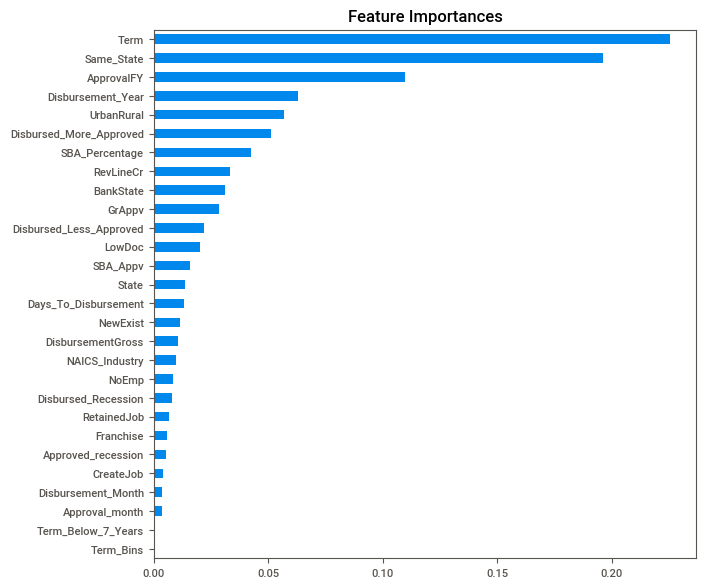

In [324]:
# Plot feature importances
plt.figure(figsize=(7,7))
importances.sort_values().plot.barh()
plt.title("Feature Importances")
plt.savefig("feature_importances", transparent = True, bbox_inches = "tight")
plt.show()